## Time to get your hands dirty. Black-hole binary formation channels with gaussian mixtures.

Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset. 

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.


Right now, state-of-the-art analyses seems to say that many channels are all at play. This is a plot by [Zevin et al (2020)](https://arxiv.org/abs/2011.10057)

where they consider 5 possibilities for the formation of black hole binaries: common envelope (CE), chemically omogenous stars (CHE), globular clusters (GC), nuclear star clusters (NSC) and stable mass transfer (SMT). 

If you want to know more about LIGO-driven astrophysics and black hole binaries formation channels, these are some recent reviews: [Mandel and Farmer (2021)](https://arxiv.org/abs/1806.05820), [Mapelli (2021)](https://arxiv.org/abs/2106.00699), [Gerosa and Fishbach (2021)](https://arxiv.org/abs/2105.03439).

Anyway. You can find today's dataset at `solutions/formationchannels.npy`.

*Hint*: Note that the data provided are of shape (N,1), not (N,). This might be confusing at first, but it's the format that sklearn wants (more on this in a future lecture).  A useful tool to convert between the two is [np.newaxis](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it).


Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) We'll use `sklearn.mixture.GaussianMixture`. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. Today's exercise is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in research...

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in this class.

4) For each of this fits, compute the AIC (easy! It's an attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

In [1]:
# LECTURE 6-> BLACK-HOLE BINARY FORMATION CHANNELS WITH GAUSSIAN MIXTURES: figure out how many of formation channels are at play.
# 5 possibilities for the formation of black hole binaries: 
# common envelope (CE), chemically omogenous stars (CHE), globular clusters (GC), nuclear star clusters (NSC) and stable mass transfer (SMT).

# > fit a Gaussian Mixture model: thes model is a sum of gaussians each with mean and standard deviation and weight 
# This depends on 3N-1 parameters

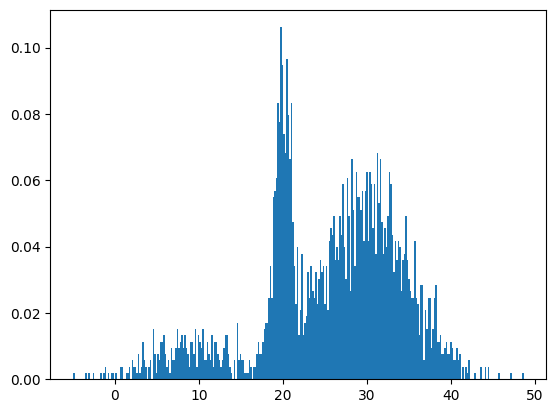

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.mixture as skm

data = np.load('formationchannels.npy')

plt.hist(data, bins=300, density=True)
plt.show()

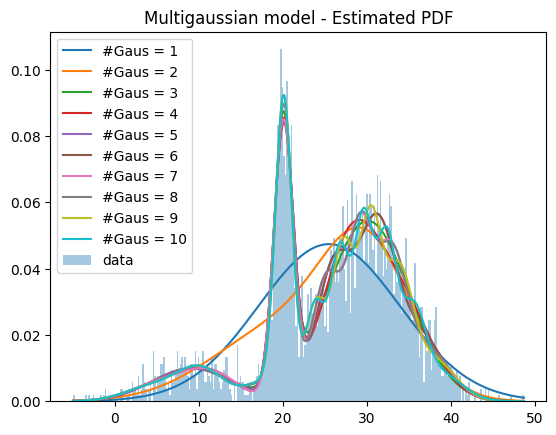

In [3]:
AIC_list = [] # Akaike Information Criterion
colors = plt.cm.tab10(np.linspace(0, 1, 10))  

for N in range(1, 11, 1):
    MG = skm.GaussianMixture(n_components=N, random_state=42).fit(data)
    AIC_list.append(MG.aic(data.reshape(-1, 1)))
    x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
    pdf = np.exp(MG.score_samples(x))  # return the Log(probability) from the whole data sample under the model
    plt.plot(x, pdf, label=f"#Gaus = {N}", color=colors[N-1])
    
plt.hist(data, bins=300, label="data", density=True, alpha = 0.4)
plt.title("Multigaussian model - Estimated PDF")
plt.legend() 
plt.show()

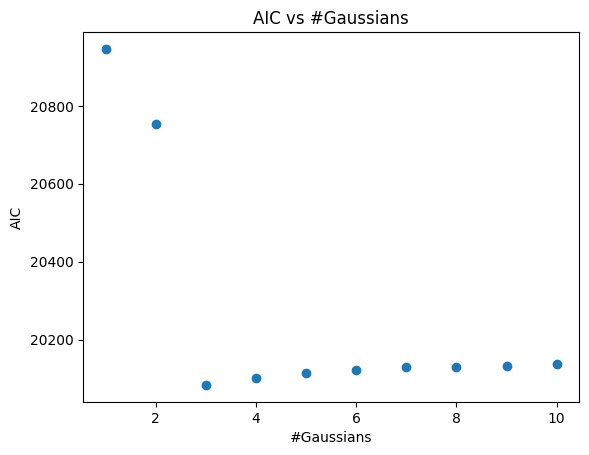

In [4]:
number = list(range(1, 11))  

plt.scatter(number, AIC_list)
plt.title("AIC vs #Gaussians")
plt.xlabel("#Gaussians")
plt.ylabel("AIC")
plt.show()

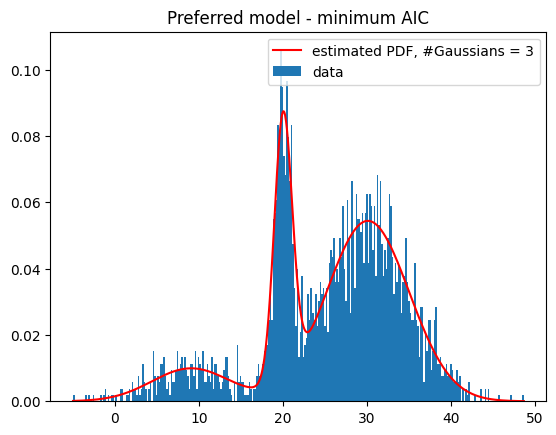

In [5]:
# BEST FIT
MG3 = skm.GaussianMixture(n_components=3, random_state=42).fit(data)
x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
pdf = np.exp(MG3.score_samples(x))  # return the Log(probability) from the whole data sample under the model
plt.plot(x, pdf, label=f"estimated PDF, #Gaussians = 3", color='r')
plt.title("Preferred model - minimum AIC")
plt.hist(data, bins=300, label="data", density=True)
plt.legend()
plt.show()

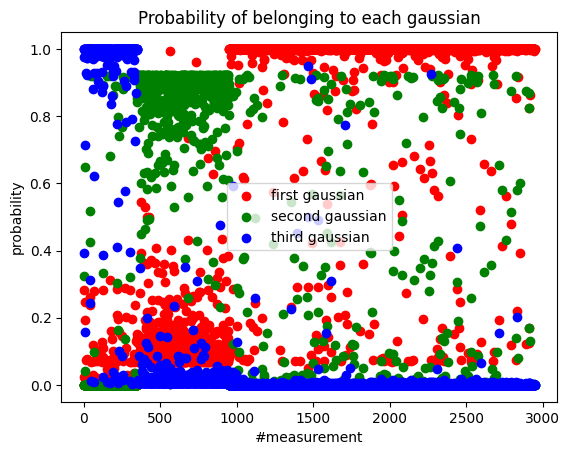

In [6]:
weights = MG3.weights_  # weights of the components
means = MG3.means_      # components means
covariances = MG3.covariances_  # components covariances

# Probability prediction matrix: len(data) x 3 -> probability of the data of belonging of a certain gaussian 
probability = MG3.predict_proba(data)
NN = 0

x1 = []
x2 = []
x3 = []

y1 = []
y2 = []
y3 = []

while NN < len(data):
    x1.append(NN)
    x2.append(NN)
    x3.append(NN)
    
    y1.append(probability[NN][0])
    y2.append(probability[NN][1])
    y3.append(probability[NN][2])

    NN += 1   

plt.scatter(x1, y1, c='red', label='first gaussian')
plt.scatter(x2, y2, c='green', label='second gaussian')
plt.scatter(x3, y3, c='blue', label='third gaussian')
plt.title("Probability of belonging to each gaussian")
plt.xlabel("#measurement")
plt.ylabel("probability")
plt.legend()
plt.show()